### Part 1.1

In [19]:
import scipy.signal as sig
import skimage as sk
import skimage.io as skio
import cv2
import matplotlib.pyplot as plt
import numpy as np

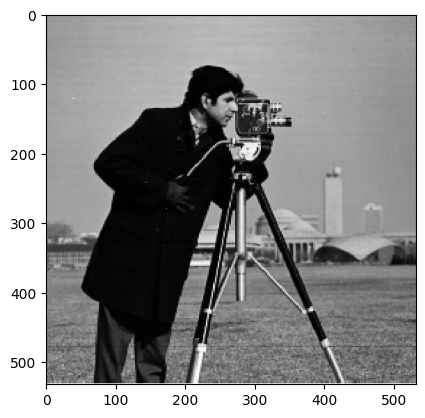

In [151]:
#Load image
imname = './images/cameraman.png'
im = cv2.imread(imname, cv2.IMREAD_GRAYSCALE)[10:, :-8]
plt.imshow(im, cmap = "grey")

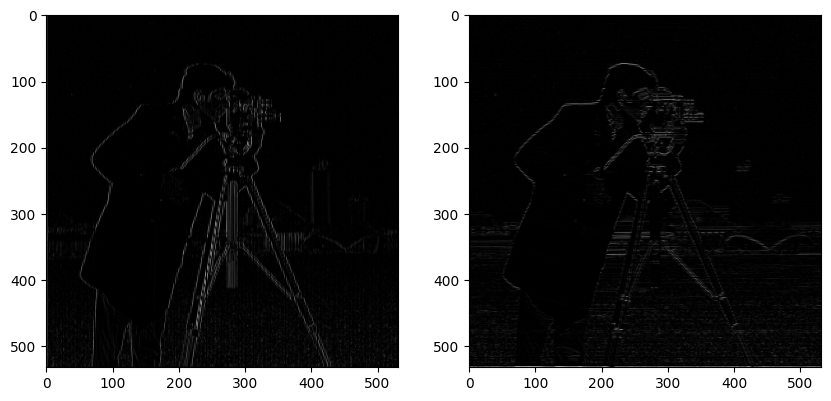

In [152]:
#Filtering
verticleFilter = np.array([[1, -1], [1, -1]])
horizontalFilter = np.array([[1, 1],[-1, -1]])
verticalGradient = np.abs(sig.convolve2d(im, verticleFilter, mode = 'same'))
horizontalGradient = np.abs(sig.convolve2d(im, horizontalFilter, mode = 'same'))

#Normalize to 0-1 range
verticalGradientNormalized = verticalGradient / np.max(np.abs(verticalGradient), axis=None)
horizontalGradientNormalized = horizontalGradient.astype(np.int64) / np.max(np.abs(horizontalGradient), axis=None)

fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(verticalGradientNormalized, cmap='grey')
axs[1].imshow(horizontalGradientNormalized, cmap='grey')

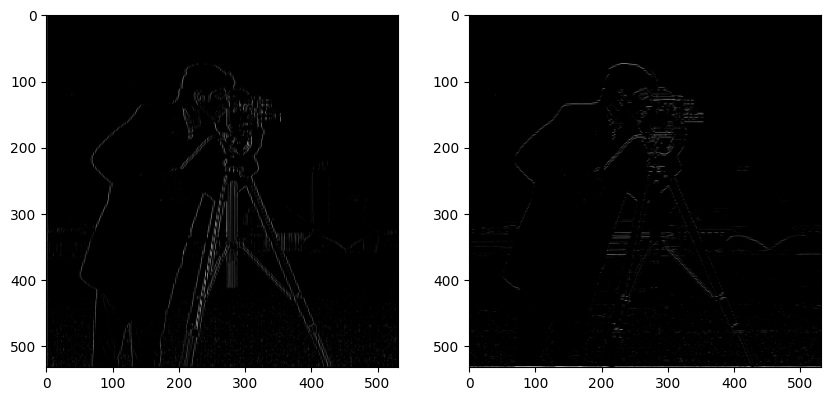

In [153]:
#Clipping noise
bottomRail = np.percentile(verticalGradientNormalized, 91)
verticalGradientClipped = np.clip(verticalGradientNormalized, bottomRail, 1)

bottomRail = np.percentile(horizontalGradientNormalized, 95)
horizontalGradientClipped = np.clip(horizontalGradientNormalized, bottomRail, 1)

fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(verticalGradientClipped, cmap='grey')
axs[1].imshow(horizontalGradientClipped, cmap='grey')

### Part 1.2

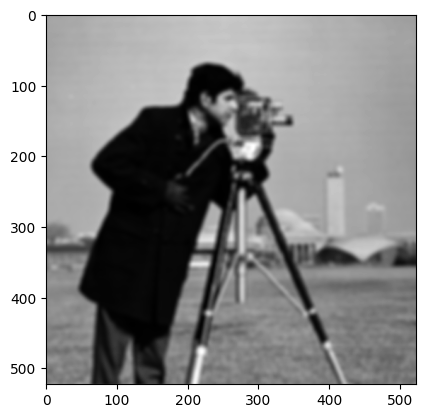

In [182]:
gaussianFilter = cv2.getGaussianKernel(10, sigma=3)
gaussianFilter = gaussianFilter * gaussianFilter.T
imBlurred = sig.convolve2d(im, gaussianFilter, mode="valid")
plt.imshow(imBlurred, cmap = "grey")

The image is smoothed/blurry now. There is less fine grain details to be seen.

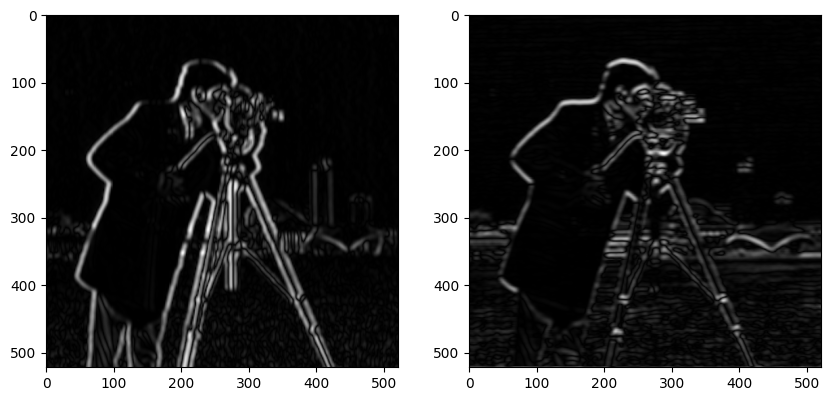

In [183]:
#Filtering
verticleFilter = np.array([[1, -1], [1, -1]])
horizontalFilter = np.array([[1, 1],[-1, -1]])
verticalGradient = np.abs(sig.convolve2d(imBlurred, verticleFilter, mode = 'valid'))
horizontalGradient = np.abs(sig.convolve2d(imBlurred, horizontalFilter, mode = 'valid'))

#Normalize to 0-1 range
verticalGradientNormalized = verticalGradient / np.max(np.abs(verticalGradient), axis=None)
horizontalGradientNormalized = horizontalGradient / np.max(np.abs(horizontalGradient), axis=None)

fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(verticalGradientNormalized, cmap='grey')
axs[1].imshow(horizontalGradientNormalized, cmap='grey')

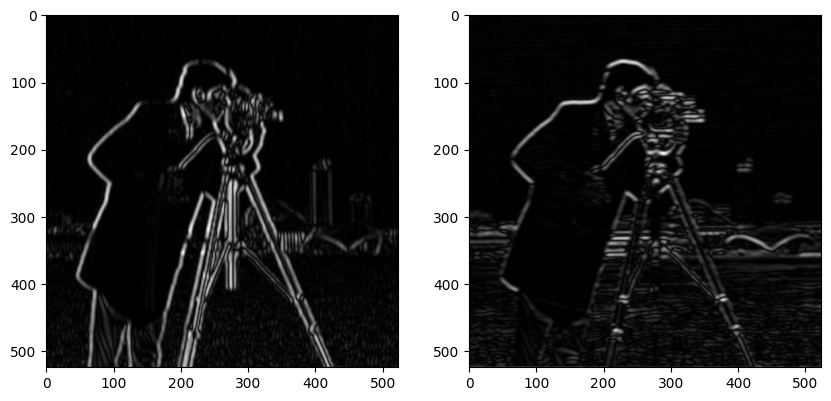

In [180]:
#Filtering with convolved guassian and derivative
verticleFilter = np.array([[1, -1], [1, -1]])
horizontalFilter = np.array([[1, 1],[-1, -1]])
verticalGradient = np.abs(sig.convolve2d(im, sig.convolve2d(gaussianFilter, verticleFilter, mode = 'valid'), mode = 'valid'))
horizontalGradient = np.abs(sig.convolve2d(im, sig.convolve2d(gaussianFilter, horizontalFilter, mode = 'valid'), mode = 'valid'))

#Normalize to 0-1 range
verticalGradientNormalized = verticalGradient / np.max(np.abs(verticalGradient), axis=None)
horizontalGradientNormalized = horizontalGradient / np.max(np.abs(horizontalGradient), axis=None)

fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(verticalGradientNormalized, cmap='grey')
axs[1].imshow(horizontalGradientNormalized, cmap='grey')

They are the same.